### Capstone Project 

The Project is a Machine Learning Solution for an Bank (Blossom Bank Plc) aimed at Predicting Online Payment Fraud. This Machine Learning Model seeks to reduce to the barest Minimum, incidents of Fraudulent Transactions and increase efficiency of detecting possible Fraudulent Payments

### Methodology
By analysing trends and detail from Customers' Transaction History, patterns can be observed and categorisations deduced.


### Key Terms in Dataset ,
    
    - Step: Represents a unit of time where 1 step equals 1 hour
    - Type: type of online transaction
    - Amount: the amount of the transaction
    - NameOrig: customer starting the transaction
    - OldbalanceOrg: balance before the transaction
    - NewbalanceOrig: balance after the transaction
    - NameDest: recipient of the transaction
    - OldbalanceDest: initial balance of recipient before the transaction
    - NewbalanceDest: the new balance of the recipient after the transaction
    - IsFraud: fraud transaction

In [1]:
#import python libraries for data manipulation and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 




In [2]:
bankdata = pd.read_csv('C:\\Users\\PROGRESSIVE\\Downloads\\Online Payment Fraud Detection.csv', encoding='unicode-escape')

In [3]:
#...To see the overview of the data
bankdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
#...to check rows and columns
bankdata.shape


(1048575, 10)

In [5]:
#Each Row is a transaction line and each Column of Data represents a Category
print("We have a total of {0} Transactions in {1} categories of data".format(bankdata.shape[0],bankdata.shape[1]))

We have a total of 1048575 Transactions in 10 categories of data


In [6]:
#...to check columns and datatypes of each column in our data set 
bankdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


#No Null or missing values in this Dataset

In [7]:
#...to check the Descriptive Statistics
bankdata.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [8]:
#...transposing for a better view
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1048575.0,2.696617e+01,1.562325e+01,1.0,15.000,20.00,39.000,95.0
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0
isFraud,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.0


# Checking for Correlation

<AxesSubplot:>

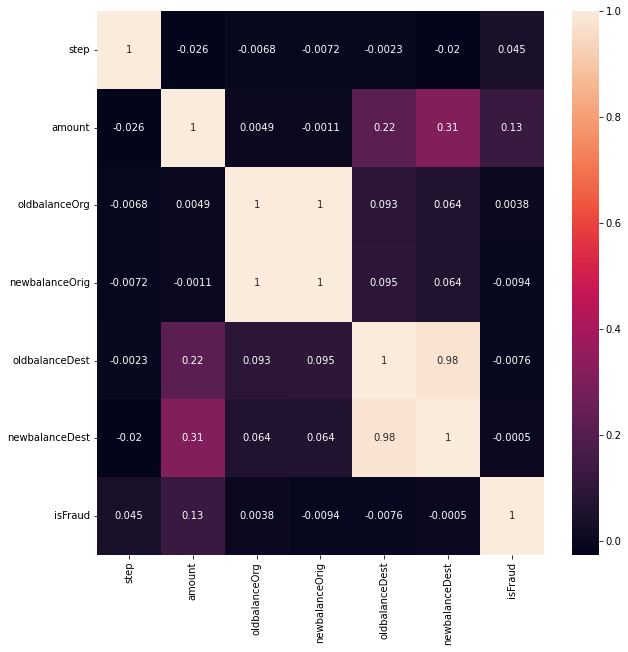

In [9]:

plt.figure(figsize=(10,10))
sns.heatmap(bankdata.corr(), annot=True)

#..Now to check total sum of Fraudulent transactions

In [10]:

bankdata.isFraud.sum()

1142

In [11]:
bankdata.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [12]:
bankdata.isFraud.value_counts(normalize=True)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

In [13]:

def fraud (f):
    if f == 1:
        return 'ISFRAUD'
    else:
        return 'ISNOTFRAUD'

bankdata['isFraud'] = bankdata['isFraud'].apply(fraud)
bankdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,ISNOTFRAUD
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,ISNOTFRAUD
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,ISFRAUD
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,ISFRAUD
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,ISNOTFRAUD


In [14]:
#expressing Fraud distribution is as percentage
isFraud_percent = (bankdata['isFraud'].value_counts()/bankdata.shape[0]*100).round(2)
isFraud_percent

ISNOTFRAUD    99.89
ISFRAUD        0.11
Name: isFraud, dtype: float64

Text(0.5, 0, 'Fraudulent Transaction Status ')

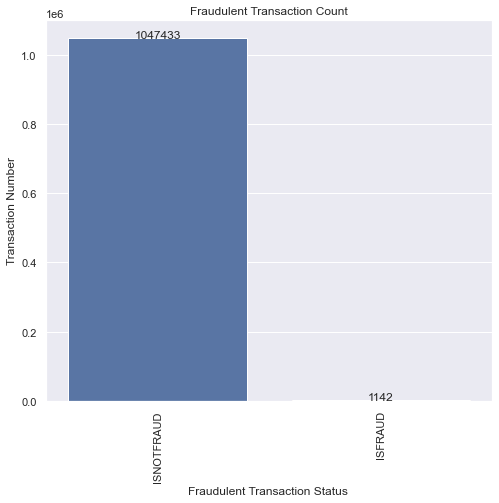

In [15]:
#univariate analysis cells
# Distribution of 'IsFraud' to display 'Fraud' and 'Not Fraud'
sns.set()
fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='isFraud', data=bankdata)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Fraudulent Transaction Count')
plt.ylabel('Transaction Number')
plt.xlabel('Fraudulent Transaction Status ')

In [16]:
bankdata.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [17]:
bankdata.type.value_counts(normalize=True)

CASH_OUT    0.356332
PAYMENT     0.337480
CASH_IN     0.216608
TRANSFER    0.082734
DEBIT       0.006845
Name: type, dtype: float64

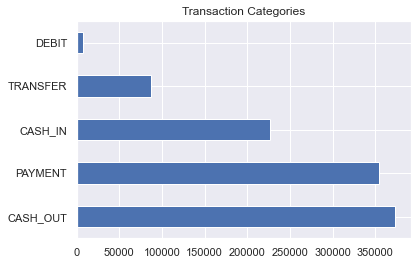

In [18]:
#...to Visualise the Data
#Initialise the Seaborn Library via 
sns.set()


bankdata.type.value_counts().plot.barh()
plt.title('Transaction Categories')
plt.show()

In [19]:
#expressing 'Transaction type' distribution is as percentage
type_percent = (bankdata['type'].value_counts()/bankdata.shape[0]*100).round(2)
type_percent

CASH_OUT    35.63
PAYMENT     33.75
CASH_IN     21.66
TRANSFER     8.27
DEBIT        0.68
Name: type, dtype: float64

In [20]:
#Features Selection:
# We select the columns to use :
Features =['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']

bankdata[Features].describe().T


,count,mean,std,min,25%,50%,75%,max
step,1048575.0,2.696617e+01,1.562325e+01,1.0,15.000,20.00,39.000,95.0
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0


# Statistical Evaluations

In [21]:
#Statistical Evaluation
from sklearn import metrics
from scipy.stats import norm
import statistics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

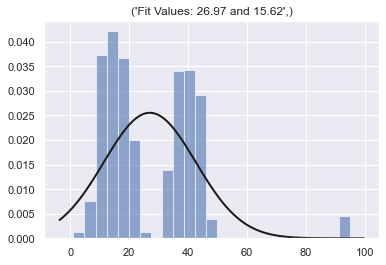

In [22]:
#Evaluation of 'Step'
# mean and standard deviation('step')\n",
mean, std = norm.fit(bankdata['step']) 
# Plot the histogram
plt.hist(bankdata['step'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std),
plt.title(title)
plt.show()

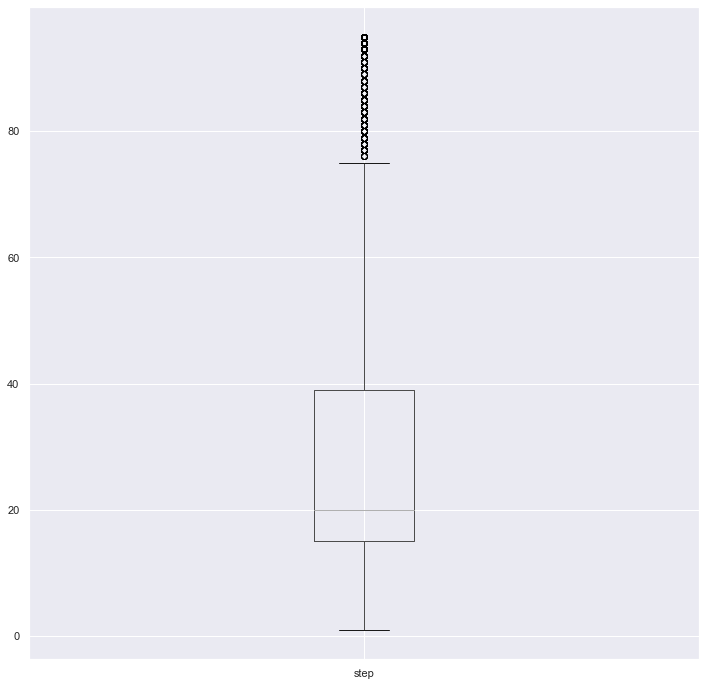

In [23]:
# Boxplot of 'Step'
plt.figure(figsize = (12, 12))
bankdata.boxplot(column= ['step'])
plt.show()

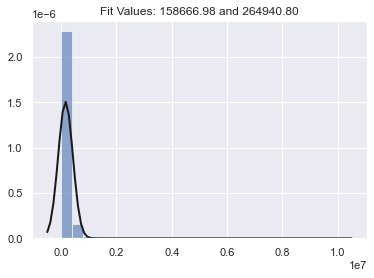

In [24]:
#Evaluation of 'Amount'
#mean and standard deviation('amount')
mean, std = norm.fit(bankdata['amount'])
 # Plot the histogram
plt.hist(bankdata['amount'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
plt.show()

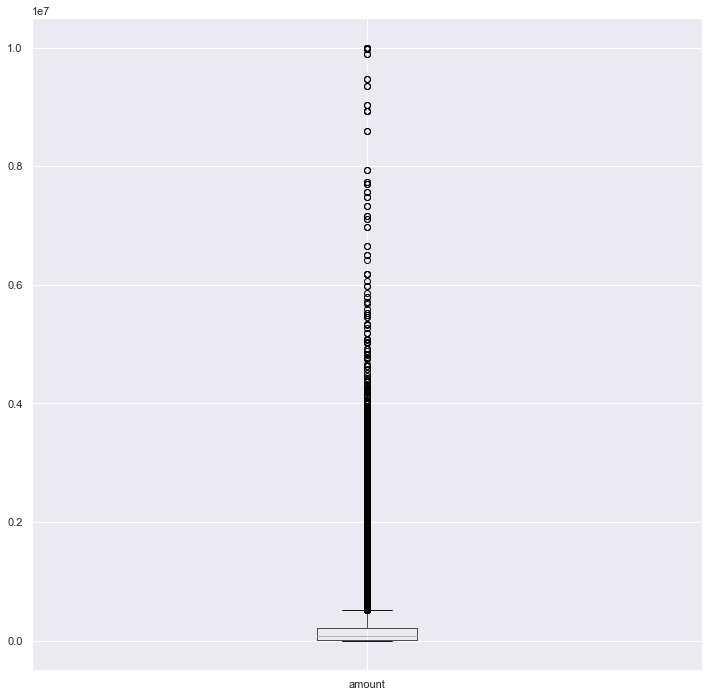

In [25]:
# Boxplot of 'Amount'
plt.figure(figsize = (12, 12))
bankdata.boxplot(column= ['amount'])
plt.show()

In [26]:
bankdata.amount.value_counts()

10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: amount, Length: 1009606, dtype: int64

In [27]:
bankdata.amount.unique()

array([ 9839.64,  1864.28,   181.  , ...,  9917.36, 14140.05, 11450.03])

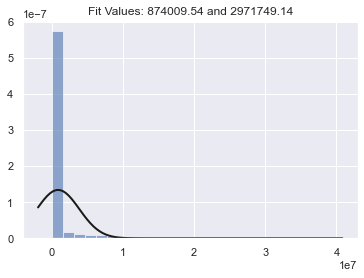

In [28]:
#Evaluation of 'oldBalanceOrg'
#mean and standard deviation('oldBalanceOrg')

mean, std = norm.fit(bankdata['oldbalanceOrg'])
 # Plot the histogram
plt.hist(bankdata['oldbalanceOrg'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
plt.show()

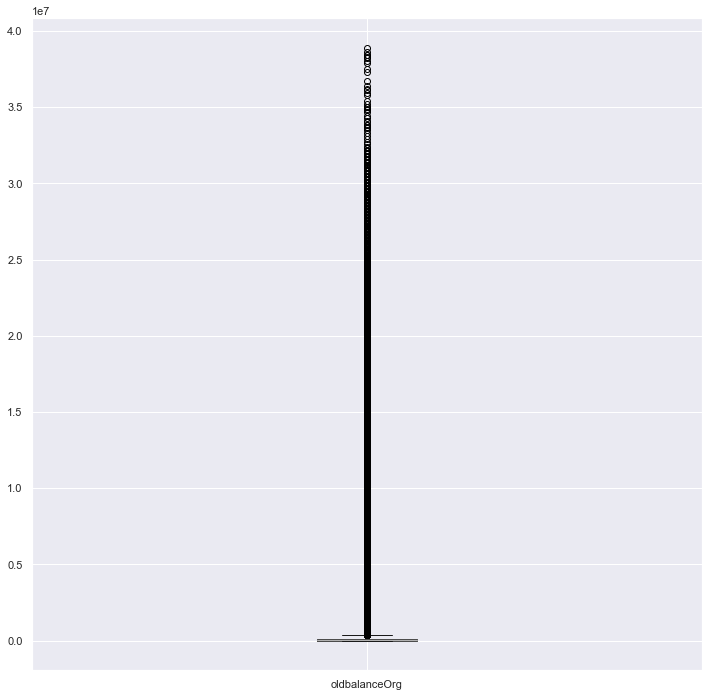

In [29]:
# Boxplot of ''oldbalanceOrg'
plt.figure(figsize = (12, 12))
bankdata.boxplot(column= ['oldbalanceOrg'])
plt.show()

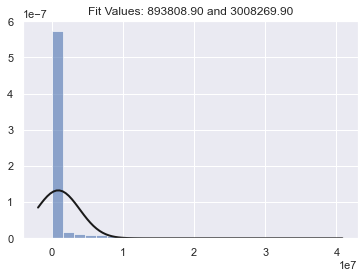

In [30]:
#Evaluation of 'newbalanceOrig'
#mean and standard deviation('newbalanceOrig')

mean, std = norm.fit(bankdata['newbalanceOrig'])
 # Plot the histogram
plt.hist(bankdata['newbalanceOrig'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
plt.show()

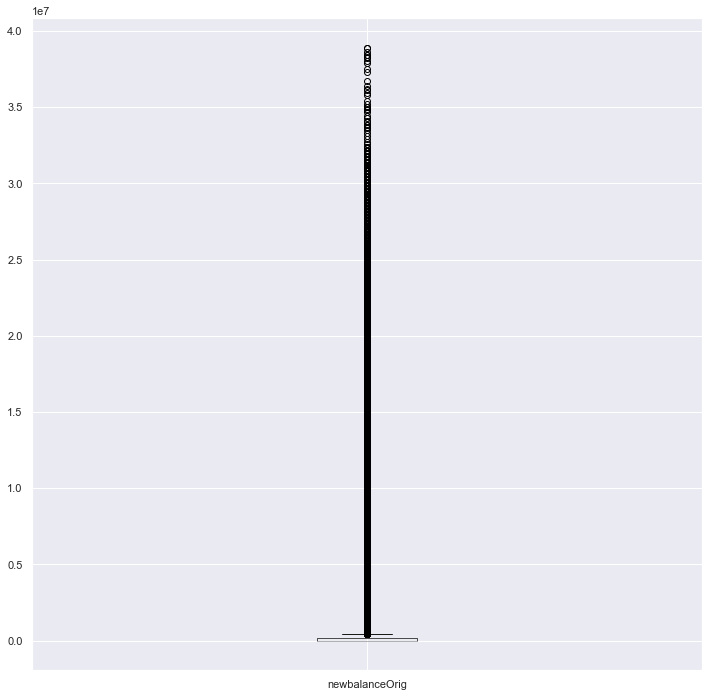

In [31]:
# Boxplot of newbalanceOrig'
plt.figure(figsize = (12, 12))
bankdata.boxplot(column= ['newbalanceOrig'])
plt.show()

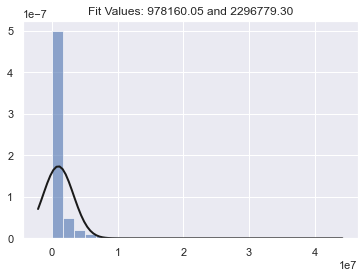

In [32]:
#Evaluation of 'oldbalanceDest'
#mean and standard deviation('oldbalanceDest')

mean, std = norm.fit(bankdata['oldbalanceDest'])
 # Plot the histogram
plt.hist(bankdata['oldbalanceDest'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
plt.show()

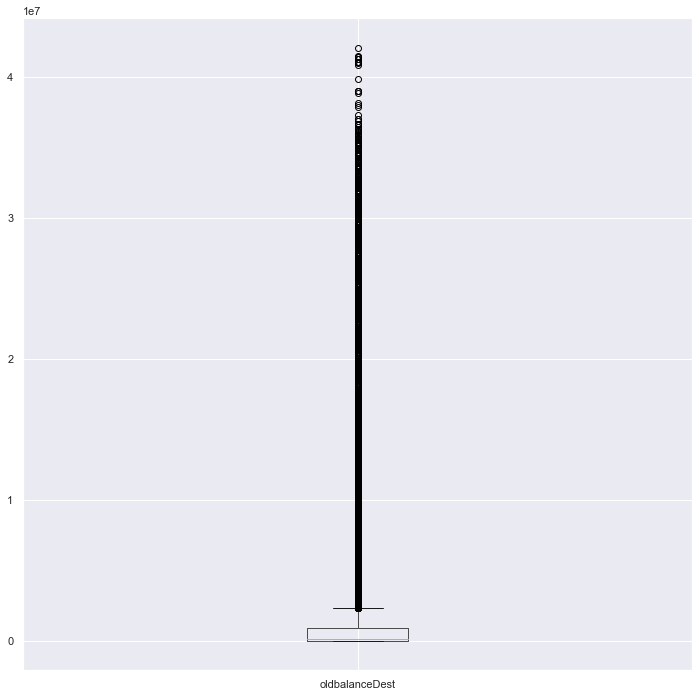

In [33]:
# Boxplot of 'oldbalanceDest'
plt.figure(figsize = (12, 12))
bankdata.boxplot(column= ['oldbalanceDest'])
plt.show()

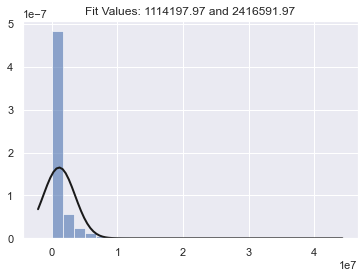

In [34]:
#Evaluation of 'newbalanceDest'
#mean and standard deviation('newbalanceDest')

mean, std = norm.fit(bankdata['newbalanceDest'])
 # Plot the histogram
plt.hist(bankdata['newbalanceDest'], bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)
plt.title(title)
plt.show()

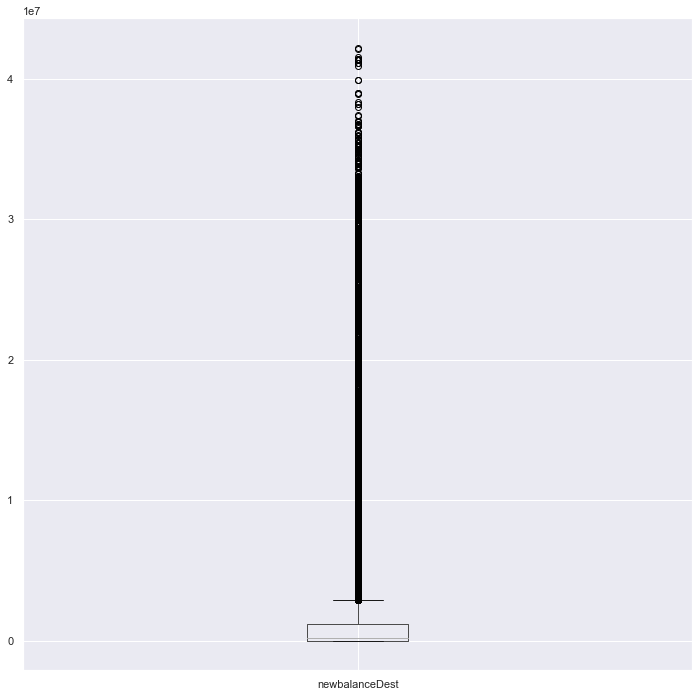

In [35]:
# Boxplot of 'newbalanceDest'
plt.figure(figsize = (12, 12))
bankdata.boxplot(column= ['newbalanceDest'])
plt.show()

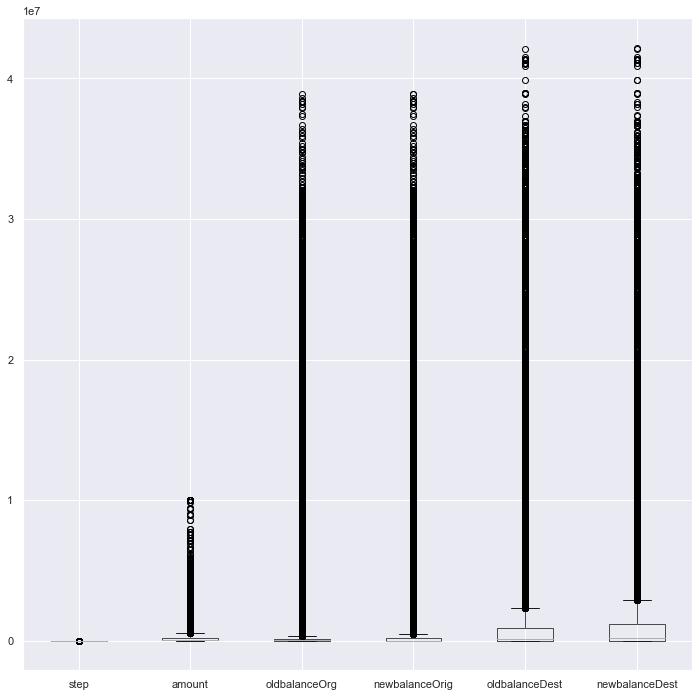

In [36]:
# Boxplot of all variables
plt.figure(figsize = (12, 12))
bankdata.boxplot(column= ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
plt.show()

# Bivariate analysis 

In [37]:

# Crosstab Display of Online transaction type by Fraudulent transaction

fraud_type_pivot = pd.crosstab(bankdata.type, bankdata.isFraud ,normalize='index')
display(fraud_type_pivot)
 

isFraud,ISFRAUD,ISNOTFRAUD
type,,
CASH_IN,0.000000,1.000000
CASH_OUT,0.001547,0.998453
DEBIT,0.000000,1.000000
PAYMENT,0.000000,1.000000
TRANSFER,0.006501,0.993499


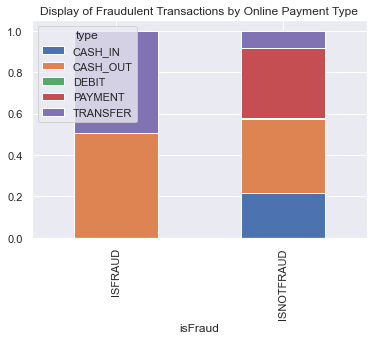

In [38]:
# Graphical display of fraudulent transactions by online transaction type
fraud_type_pivot = pd.crosstab(bankdata.isFraud, bankdata.type ,normalize='index')

#plot the data
fraud_type_pivot.plot.bar(stacked=True)
plt.title('Display of Fraudulent Transactions by Online Payment Type')
plt.show()

In [39]:
fraud_type_pivot.value_counts()

CASH_IN   CASH_OUT  DEBIT     PAYMENT   TRANSFER
0.000000  0.506130  0.000000  0.000000  0.493870    1
0.216844  0.356169  0.006853  0.337848  0.082286    1
dtype: int64

#An Observation here is that The Fraudulent Transactions were in the category of 'Transfers' and 'Cash Out', with the most instances under 'Cash Out'

Text(0, 0.5, 'COUNT')

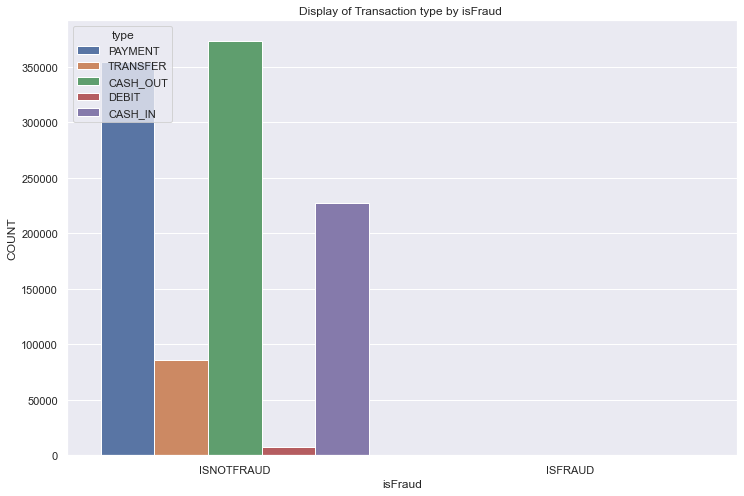

In [40]:
#Display of Transactions based on whether 'isFraud' or notFraud and Payment 'type'
plt.figure(figsize=(12,8))
plt.title('Display of Transaction type by isFraud ')
sns.countplot(x='isFraud', data=bankdata, hue='type')
plt.xlabel('isFraud')
plt.ylabel('COUNT')

#multivariate analysis cells

# Modelling

In [41]:
### Feature Engineering and Encoding
# Import LabelEncoder libraries
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()
le

LabelEncoder()

In [43]:
# Encode the target column('isFraud')
#ISFRAUD = 1, ISNOTFRAUD = 0
bankdata['isFraud'] = le.fit_transform(bankdata['isFraud'])
bankdata.head(20)



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,1
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,1
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,1
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,1
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,1
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,1


In [44]:
# Carry out One-Hot-Encoding on other categorical features to numerical ,
#1. select categorical variables
bankdata_categorical = ['type',]

#2. We use pd.get_dummies() for one hot encoding
categorical_dummies = pd.get_dummies(bankdata[bankdata_categorical])
#view our new categories
categorical_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [45]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names

bankdata = pd.concat([bankdata, categorical_dummies], axis=1)
#View the new data columns
print(bankdata.shape)
bankdata.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,1,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,1,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,1,0,0,0,1,0


In [46]:
#remove the initial categorical columns now that we have encoded them and also other irrelevant columns
#to delete all the irrelevant  selected columns at once, pass them in a list called unreqrd_columns
unreqrd_columns = ['type', 'nameOrig', 'nameDest']
bankdata = bankdata.drop(unreqrd_columns,axis=1)
print(bankdata.shape)
bankdata.head()

(1048575, 12)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,1,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,1,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,1,0,0,0,1,0


In [47]:
#Select Features
#Select  target data column 'y'
#Assign our training data to 'X'
X = bankdata.drop('isFraud', axis=1)
y = bankdata['isFraud']
print(X.head())
print(y.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0             0.0             0              0           0             1   
1             0.0             0              0           0             1   
2             0.0             0              0           0             0   
3             0.0             0              1           0             0   
4             0.0             0              0           0             1   

   type_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0  
0    1
1    1
2    0

In [48]:
y.value_counts()

1    1047433
0       1142
Name: isFraud, dtype: int64

In [49]:
## Train Test Split
#use train_test_split to divide the dataset into train and test datasets
#split into training and validation sets using a 40% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

print('\n',X_train.shape)
print('\n',X_test.shape)
print('\n',y_train.shape)
print('\n',y_test.shape)


 (629145, 11)

 (419430, 11)

 (629145,)

 (419430,)


In [50]:
## Machine Learning Algorithm Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [51]:
#Initializing DecisionTree
DT_model = DecisionTreeClassifier()
#Initialize KNeighborsClassifier
KN_model = KNeighborsClassifier()
#Initialize RandomForestClassifier
RF_model =  RandomForestClassifier()
# Initialize LogisticRegression
LR_model = LogisticRegression()
 #Initialize Support Vector Machine - Classifier
SVMC_model = SVC()

## Train and Test the models

Fitting and Training with DecisionTreeClassifier....

In [52]:
DT_model = DT_model.fit(X_train, y_train)
DT_preds = DT_model.predict(X_test)

print("DecisionTree Accuracy is", accuracy_score(DT_preds,y_test))
print("DecisionTree Recall is", recall_score(DT_preds,y_test))
print("DecisionTree Precision is:", precision_score(DT_preds,y_test))

DecisionTree Accuracy is 0.9995493884557614
DecisionTree Recall is 0.9997684848166615
DecisionTree Precision is: 0.9997804159685326


In [53]:
import os

Fitting and Training with KNeighborsClassifier(KNN)....

In [54]:
KN_model = KN_model.fit(X_train, y_train)
KN_preds = KN_model.predict(X_test)

print("KNeighborsClassifier Accuracy is:", accuracy_score(KN_preds,y_test))
print("KNeighborsClassifier Precision is:", precision_score(KN_preds,y_test))
print("KNeighborsClassifier Recall is:", recall_score(KN_preds,y_test))

KNeighborsClassifier Accuracy is: 0.9993419640941278
KNeighborsClassifier Precision is: 0.9998376987593502
KNeighborsClassifier Recall is: 0.9995037149796953


#Fitting and Training with RandomForestClassifier....

In [55]:
RF_model = RF_model.fit(X_train, y_train)
RF_preds = RF_model.predict(X_test)

print("RandomForestClassifier Accuracy is:", accuracy_score(RF_preds,y_test))
print("RandomForestClassifier Precision is", precision_score(RF_preds,y_test))
print("RandomForestClassifier Recall is:", recall_score(RF_preds,y_test))


RandomForestClassifier Accuracy is: 0.9997520444412655
RandomForestClassifier Precision is 0.9999904528681971
RandomForestClassifier Recall is: 0.9997613763810342


#Fitting and Training with LogisticRegression.....

In [56]:
LR_model = LR_model.fit(X_train, y_train)
LR_preds = LR_model.predict(X_test)

print("LogisticRegression Accuracy is:", accuracy_score(LR_preds,y_test))
print("LogisticRegression Precision is:", precision_score(LR_preds,y_test))
print("LogisticRegression Recall is:", recall_score(LR_preds,y_test))

LogisticRegression Accuracy is: 0.9989962568247384
LogisticRegression Precision is: 0.999696878565257
LogisticRegression Recall is: 0.9992985653992332


#Fitting and Training with Support Vector Machine - Classifier....

In [ ]:
SVMC_model = SVMC_model.fit(X_train, y_train)
SVM_preds = SVMC_model.predict(X_test)


print("Support Vector Machine - Classifier Accuracy is:", accuracy_score(SVM_preds,y_test))
print("Support Vector Machine - Classifier Precision is:", precision_score(SVM_preds,y_test))
print("Support Vector Machine - Classifier Recall is:", recall_score(SVM_preds,y_test))


In [61]:
## Print Report Summary
#create list of your model names
modelS = [DT_model,KN_model,RF_model,LR_model]

In [62]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
#predict on the fitted model
prediction = model.predict(X_test)
#print evaluation metric
print('For {}, Accuracy score is {} '.format(model.__class__.__name__,accuracy_score(prediction,y_test))),
print(classification_report(prediction, y_test))



AttributeError: 'list' object has no attribute 'predict'

In [63]:
#loop through each model, training in the process,
for model in models:
     trainer(model,X_train,y_train,X_test,y_test)

In [ ]:
### Our Findings
#We can deduce from our analysis above that model that has produced the best metrics is RandomForestClassifier model with the   highest Accuracy and Recall of 99% and 98% respectively\n",
#There is need for us to also bear in mind that our Dataset has a problem of Class imbalance with about 99% of the Dataset       being biased infavour of 'ISNOTFRAUD' \n

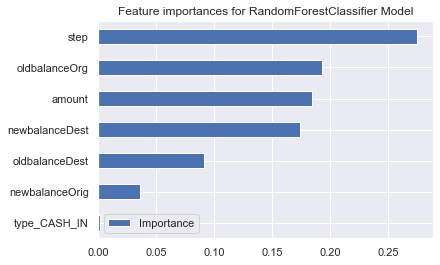

In [64]:
#get feature importances
RFC_important = pd.DataFrame(data = RF_model.feature_importances_,index = X_test.columns, columns=['Importance'])
#plot top 10 feature importances, sorted
RFC_important[:7].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for RandomForestClassifier Model')
plt.show()

### Training our Model with Important Features"

In [65]:
#Select top 10 important Features
RFC_important[:7].sort_values(by='Importance').index.values


array(['type_CASH_IN', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'amount', 'oldbalanceOrg', 'step'], dtype=object)

In [78]:
#create a new X train with only 7 features
X_train2 = X_train[['type_CASH_IN', 'newbalanceOrig', 'oldbalanceDest',
   'newbalanceDest', 'amount', 'oldbalanceOrg', 'step']],
X_train2

(        type_CASH_IN  newbalanceOrig  oldbalanceDest  newbalanceDest  \
 515967             0        12898.78      1266760.92      1360059.14   
 254498             0            0.00            0.00            0.00   
 382134             0         4444.83            0.00            0.00   
 411003             0            0.00            0.00       205738.34   
 349275             1      8205229.91      3234378.36      3107462.04   
 ...              ...             ...             ...             ...   
 259175             0            0.00            0.00            0.00   
 157885             0        55303.66            0.00            0.00   
 638196             0            0.00       254218.75       345440.98   
 676798             0            0.00      5323224.08      5293389.91   
 934017             0        32483.48            0.00            0.00   
 
            amount  oldbalanceOrg  step  
 515967   93298.22      106197.00    20  
 254498    3289.24           0.00    1

In [81]:

X_train2.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [69]:
#create a new X_valid with only 10 features so we can predict on them
X_test2 = X_test[['type_CASH_IN', 'newbalanceOrig', 'oldbalanceDest',
 'newbalanceDest', 'amount', 'oldbalanceOrg', 'step']]

In [79]:
#train and predict
RF_model.fit(X_train2,y_train)


ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:

pred2 = RF_model.predict(X_test2)

# Print result based on 10 important features
print("Accuracy", accuracy_score(pred2,y_test))
print("Precision", precision_score(pred2,y_test))
print("Recall", recall_score(pred2,y_test))

In [ ]:
# Evaluate our models using k-fold cross-validation\n",
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
#create function to train a model with cross validations and evaluate accuracy\n",
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
print('Accuracy: %.3f' % (mean(scores)))
print(scores)
print(model.__class__.__name__, 'Accuracy: %.3f' % (mean(scores)))

In [ ]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X,y)